# Importing Libraries

In [1]:
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier
import seaborn as sns
from wordcloud import WordCloud
import os

# Loading dataset

In [2]:
df=pd.read_csv('malicious_phish.csv')
print(df.shape)
df.head()


(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

# plotting World Cloud

In [6]:
df_phish = df[df.type=='phishing'] 
df_malware = df[df.type=='malware'] 
df_deface = df[df.type=='defacement']
df_benign = df[df.type=='benign'] 

In [7]:
phish_url = " ".join(i for i in df_phish.url)
worldcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

ValueError: Only supported for TrueType fonts

In [15]:
deface_url = " ".join(i for i in df_deface.url)
worldcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(deface_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

ValueError: Only supported for TrueType fonts

In [16]:
malware_url = " ".join(i for i in df_malware.url)
worldcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(malware_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show

ValueError: Only supported for TrueType fonts

In [17]:
benign_url = " ".join(i for i in df_benign.url)
worldcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(benign_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show

ValueError: Only supported for TrueType fonts

# Feature engineering

In [7]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [9]:
from urllib.parse import urlparse
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [10]:
pip install googlesearch-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
from googlesearch import search

In [12]:
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [13]:

def count_dot(url):
    count_dot = url.count('.')
    return count_dot
df['count.'] = df['url'].apply(lambda i: count_dot(i))


In [14]:
def count_www(url):
    url.count('www')
    return url.count('www')
df['count-www'] = df['url'].apply(lambda i: count_www(i))
def count_atrate(url):
     
    return url.count('@')
df['count@'] = df['url'].apply(lambda i: count_atrate(i))
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))



In [15]:
def count_https(url):
    return url.count('https')
df['count-https'] = df['url'].apply(lambda i : count_https(i))
def count_http(url):
    return url.count('http')
df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [16]:

def count_per(url):
    return url.count('%')
df['count%'] = df['url'].apply(lambda i : count_per(i))
def count_ques(url):
    return url.count('?')
df['count?'] = df['url'].apply(lambda i: count_ques(i))
def count_hyphen(url):
    return url.count('-')
df['count-'] = df['url'].apply(lambda i: count_hyphen(i))
def count_equal(url):
    return url.count('=')
df['count='] = df['url'].apply(lambda i: count_equal(i))
def url_length(url):
    return len(str(url))
#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))
#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)
df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))
df.head()
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,...,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,0,0,1,0,16,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,0,35,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,0,31,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,1,0,1,1,4,88,21,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,1,0,1,1,3,235,23,0,22,199


In [17]:
 pip install tld

Note: you may need to restart the kernel to use updated packages.


In [18]:

from urllib.parse import urlparse
from tld import get_tld
import os.path
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
df['fd_length'] = df['url'].apply(lambda i: fd_length(i))
#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))


In [19]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld', 'tld_length'],
      dtype='object')

# EDA

# 1. Distribution of use_of_ip

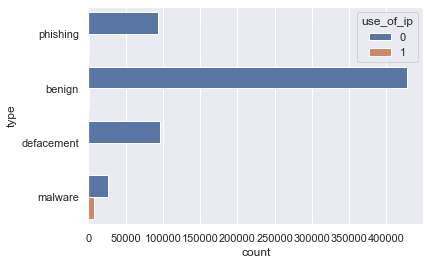

In [20]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="use_of_ip")

# 2. Distribution of abnormal url

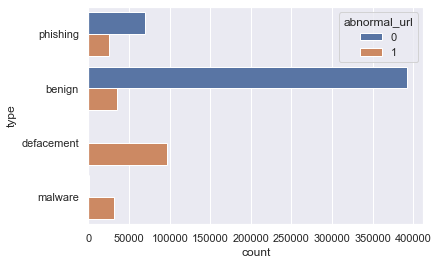

In [21]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="abnormal_url")

# 3. Distribution of Google Index

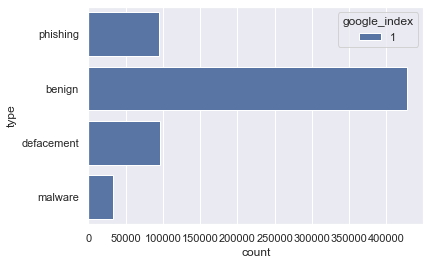

In [22]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="google_index")

# 4. Distribution of Short Url

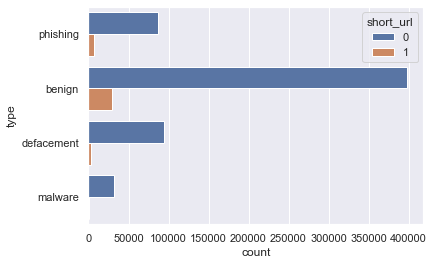

In [23]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="short_url")

# 5. Distribution of Suspicious url

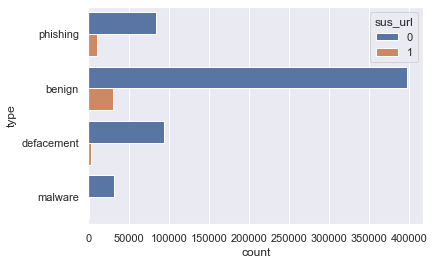

In [24]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="sus_url")

# 6. Distribution of Count of [.]Dot

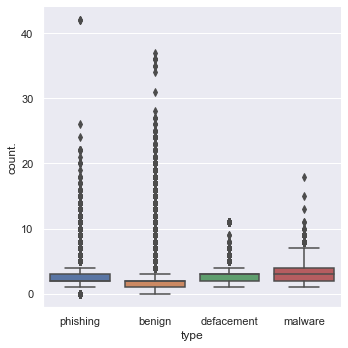

In [25]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type",y="count.",kind="box", data=df)

#  7. Distribution of count_WWW

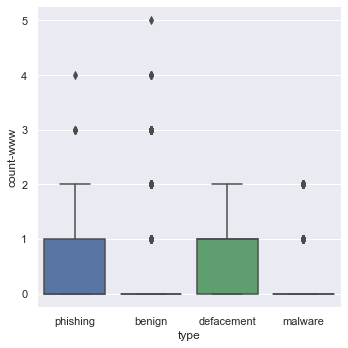

In [26]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type",y="count-www",kind="box", data=df)

# 8. Distribution of count @

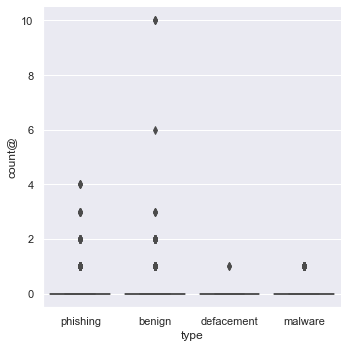

In [27]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type",y="count@",kind="box", data=df)

#  9. Distribution of count_dir

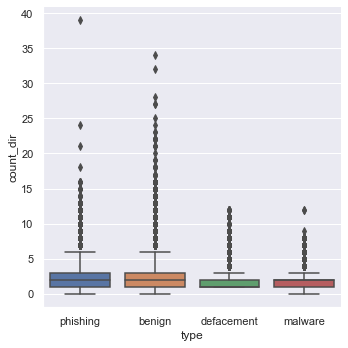

In [28]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type",y="count_dir",kind="box", data=df)

# 10. Distribution of hostname_lenght

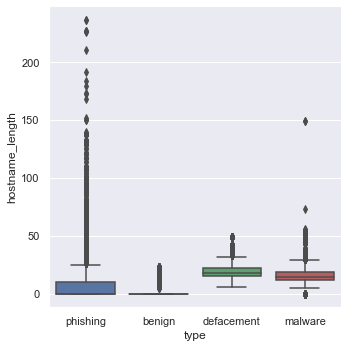

In [29]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type",y="hostname_length",kind="box", data=df)

# 11. Distribution of Top_level Domain Lenght

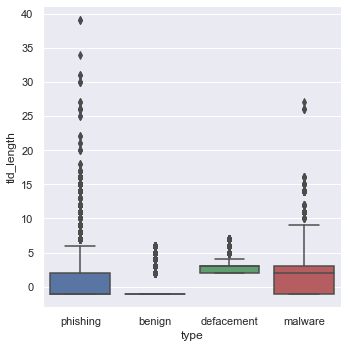

In [30]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type",y="tld_length",kind="box", data=df)

# Target Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

0    428103
1     96457
3     94111
2     32520
Name: type_code, dtype: int64

# Creation of feature Target

In [32]:
#Predictor Variables
# filtering out google_index as it has only 1 value
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

In [33]:
X.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,0,2,0,0,0,0,0,0,0,...,0,1,0,16,0,0,0,-1,0,13
1,0,0,2,0,0,2,0,0,0,0,...,0,0,0,35,0,0,5,-1,1,29
2,0,0,2,0,0,3,0,0,0,0,...,0,0,0,31,0,0,7,-1,1,25
3,0,1,3,1,0,1,0,0,0,1,...,1,1,4,88,21,0,9,2,7,63
4,0,1,2,0,0,1,0,0,0,1,...,1,1,3,235,23,0,9,3,22,199


In [34]:
X.columns

Index(['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters'],
      dtype='object')

# Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=0)

# Model Building

### 1.Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, target_names=['benign', 'defacement', 'phishing', 'malware']))

score = accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.98      0.98     85621
  defacement       0.98      0.99      0.99     19292
    phishing       0.99      0.94      0.97      6504
     malware       0.91      0.86      0.88     18822

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.95    130239
weighted avg       0.97      0.97      0.97    130239

accuracy:   0.966


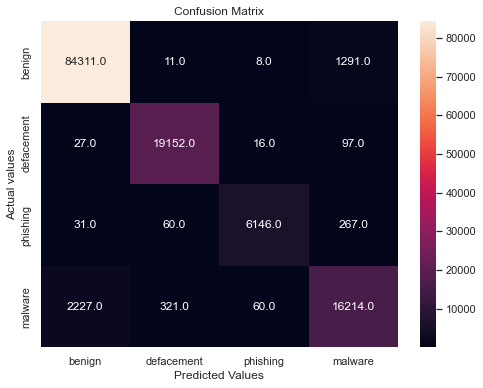

In [38]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                    index=['benign', 'defacement', 'phishing', 'malware'],
                    columns=['benign', 'defacement', 'phishing', 'malware'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted Values')
plt.show()

<AxesSubplot:>

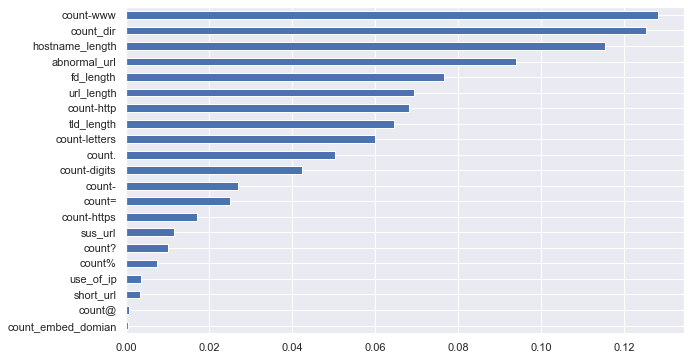

In [39]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

# Light GBM Classifer

In [40]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

lgb = LGBMClassifier(objective='multiclass', boosting_type='gbdt', n_jobs=5, silent=True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)
y_pred_lgb = LGB_C.predict(X_test)

print(classification_report(y_test, y_pred_lgb, target_names=['benign', 'defacement', 'phishing', 'malware']))

score = accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.153805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 520952, number of used features: 21
[LightGBM] [Info] Start training from score -0.419439
[LightGBM] [Info] Start training from score -1.909712
[LightGBM] [Info] Start training from score -2.996946
[LightGBM] [Info] Start training from score -1.934324
[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.96      0.99      0.98     19292
    phishing       0.97      0.90      0.93      6504
     malware       0.90      0.83      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.95    

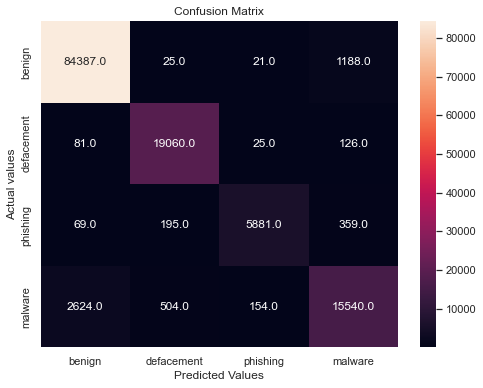

In [41]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lgb)
cm_df = pd.DataFrame(cm,
                    index=['benign', 'defacement', 'phishing', 'malware'],
                    columns=['benign', 'defacement', 'phishing', 'malware'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted Values')
plt.show()

<AxesSubplot:>

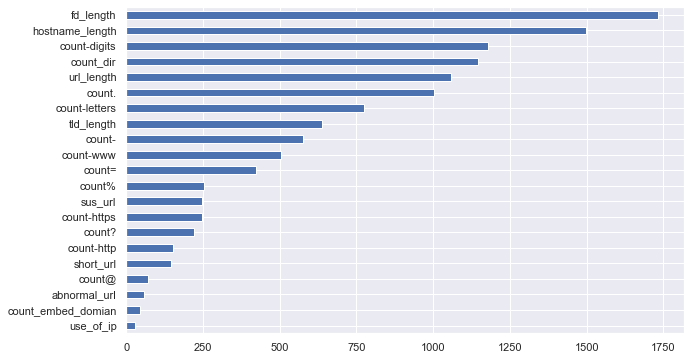

In [42]:
feat_importances = pd.Series(lgb.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

# XGboost Classifier

In [43]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
xgb_c = xgb.XGBClassifier(n_estimators=100)
xgb_c.fit(X_train, y_train)
y_pred_x = xgb_c.predict(X_test)

print(classification_report(y_test, y_pred_x, target_names=['benign', 'defacement', 'phishing', 'malware']))

score = accuracy_score(y_test, y_pred_x)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.97      0.99      0.98     19292
    phishing       0.98      0.91      0.94      6504
     malware       0.91      0.83      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.962


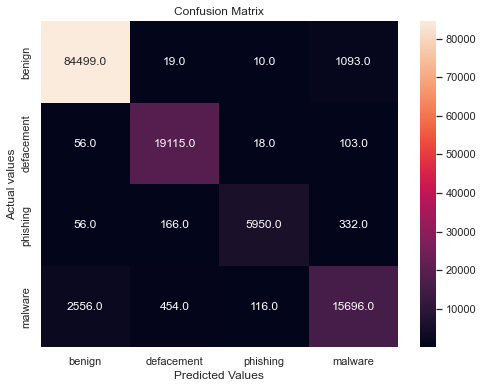

In [44]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_x)
cm_df = pd.DataFrame(cm,
                    index=['benign', 'defacement', 'phishing', 'malware'],
                    columns=['benign', 'defacement', 'phishing', 'malware'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted Values')
plt.show()

<AxesSubplot:>

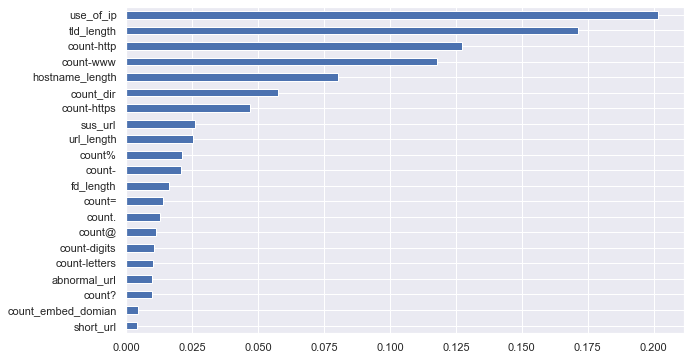

In [45]:
feat_importances = pd.Series(xgb_c.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

# Prediction

In [46]:
def main(url):
    
    status = []
    
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
      
    status.append(tld_length(tld))
    
    return status

In [47]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))
    pred = lgb.predict(features_test)
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    elif int(pred[0]) == 1.0:
        
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2.0:
        res="PHISHING"
        return res
        
    elif int(pred[0]) == 3.0:
        
        res="MALWARE"
        return res

In [54]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))
    pred = lgb.predict(features_test)
    if int(pred[0]) == 0:
        return "SAFE"
    else:
        return "BLOCK"

def check_url(url):
    prediction = get_prediction_from_url(url)
    if prediction == "SAFE":
        print("URL is safe. Proceed with request.")
        return True
    else:
        print("URL is malicious. Block request.")
        return False

# Example of how to use the check_url function:
urls = ['https://code.visualstudio.com/']
for url in urls:
    if not check_url(url):
        break  # Stop processing URLs if a malicious one is detected


[LightGBM] [Warning] Unknown parameter: silent
URL is malicious. Block request.


In [56]:
import tkinter as tk
from tkinter import messagebox
from tkinter import scrolledtext
from tkinter import ttk
import numpy as np
from tld import get_tld
from urllib.parse import urlparse  # Fixed import

# Assuming 'lgb' is defined previously in your code

def main(url):
    status = []

    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))

    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))

    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url, fail_silently=True)

    status.append(tld_length(tld))

    return status


def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))
    pred = lgb.predict(features_test)
    if int(pred[0]) == 0:
        res = "SAFE"
    elif int(pred[0]) == 1.0:
        res = "DEFACEMENT"
    elif int(pred[0]) == 2.0:
        res = "PHISHING"
    elif int(pred[0]) == 3.0:
        res = "MALWARE"
    return res


def predict_url():
    url = url_entry.get()
    if url:
        prediction = get_prediction_from_url(url)
        messagebox.showinfo("Prediction", f"The URL is predicted as: {prediction}")
    else:
        messagebox.showerror("Error", "Please enter a URL")


def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0


def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0


def count_dot(url):
    count_dot = url.count('.')
    return count_dot


def count_www(url):
    url.count('www')
    return url.count('www')


def count_atrate(url):
    return url.count('@')


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')


def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


def count_https(url):
    return url.count('https')


def count_http(url):
    return url.count('http')


def count_per(url):
    return url.count('%')


def count_ques(url):
    return url.count('?')


def count_hyphen(url):
    return url.count('-')


def count_equal(url):
    return url.count('=')


def url_length(url):
    return len(str(url))


def hostname_length(url):
    return len(urlparse(url).netloc)


def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():  # Fixed missing parentheses
            letters += 1  # Fixed indentation
    return letters


def fd_length(url):
    return 0  # Placeholder function, you can implement it based on your needs


def tld_length(tld):
    return 0  # Placeholder function, you can implement it based on your needs


# Now you can define your GUI using Tkinter


In [64]:
import pickle

# Assuming you've trained the LGBMClassifier and stored it in the variable LGB_C
# Now, let's pickle it
with open('model_pickle','wb') as f:
    pickle.dump(LGB_C, f)

# Now let's load the pickled model back
with open('model_pickle','rb') as f:
    loaded_model = pickle.load(f)

# Now you can use the loaded model for predictions
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))
    pred = loaded_model.predict(features_test)
    if int(pred[0]) == 0:
        return "SAFE"
    else:
        return "BLOCK"

# Now you can use the check_url function with the loaded model
urls = ['titaniumcoporate.co.za']
for url in urls:
    if not check_url(url):
        break  # Stop processing URLs if a malicious one is detected


[LightGBM] [Warning] Unknown parameter: silent
URL is malicious. Block request.


In [49]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [66]:
import pickle

# Assuming you've trained the LGBMClassifier and stored it in the variable LGB_C
# Now, let's pickle it
with open('model_pickle','wb') as f:
    pickle.dump(LGB_C, f)

# Now let's load the pickled model back
with open('model_pickle','rb') as f:
    loaded_model = pickle.load(f)

# Now you can use the loaded model for predictions
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))
    pred = loaded_model.predict(features_test)
    if int(pred[0]) == 0:
        return "SAFE"
    else:
        return "BLOCK"

# Now you can use the check_url function with the loaded model
urls = ['en.wikipedia.org/wiki/North_Dakota']
for url in urls:
    if not check_url(url):
        break  # Stop processing URLs if a malicious one is detected

[LightGBM] [Warning] Unknown parameter: silent
URL is safe. Proceed with request.


In [51]:
import requests
from bs4 import BeautifulSoup

# Function to fetch page content from a URL
def fetch_page_content(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.text
        else:
            print(f"Failed to fetch content from {url}. Status code: {response.status_code}")
            return None
    except Exception as e:
        print(f"Error occurred while fetching content from {url}: {e}")
        return None

# Example of how to use the function
url = 'https://en.wikipedia.org/wiki/Wiki'
content = fetch_page_content(url)
if content:
    print("Content fetched successfully.")
    # Now you can process the content further, for example, using BeautifulSoup
    soup = BeautifulSoup(content, 'html.parser')
    # Example: Extracting all paragraph text
    paragraphs = soup.find_all('p')
    for paragraph in paragraphs:
        print(paragraph.get_text())
else:
    print("Failed to fetch content. Please check the URL or try again later.")



Content fetched successfully.


A wiki (/ˈwɪki/ ⓘ WI-kee) is a form of online hypertext publication that is collaboratively edited and managed by its own audience directly through a web browser. A typical wiki contains multiple pages for the subjects or scope of the project, and could be either open to the public or limited to use within an organization for maintaining its internal knowledge base.

Wikis are enabled by wiki software, otherwise known as wiki engines. A wiki engine, being a form of a content management system, differs from other web-based systems such as blog software or static site generators, in that the content is created without any defined owner or leader, and wikis have little inherent structure, allowing structure to emerge according to the needs of the users.[1] Wiki engines usually allow content to be written using a simplified markup language and sometimes edited with the help of a rich-text editor.[2] There are dozens of different wiki engines in use, both sta